# EDA(Exploratory Data Analysis) for Breast Cancer

# Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt #matplotlib is used for plot the graphs,
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

In [2]:
data=pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Processing
Remove the duplicates and missing values

In [3]:
print(data.shape)
print(data.info())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

In [4]:
#data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.isnull().sum() # Check for missing values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df=data
ctypes ={'M' : 1, 'B' : 0}
df['diagnosis'] = df['diagnosis'].map(ctypes) # converting B and M into 0 and 1 respectively

# Data Visualization and Exploration

Count of B and M in dataset : 
0    357
1    212
Name: diagnosis, dtype: int64


<Axes: xlabel='diagnosis', ylabel='count'>

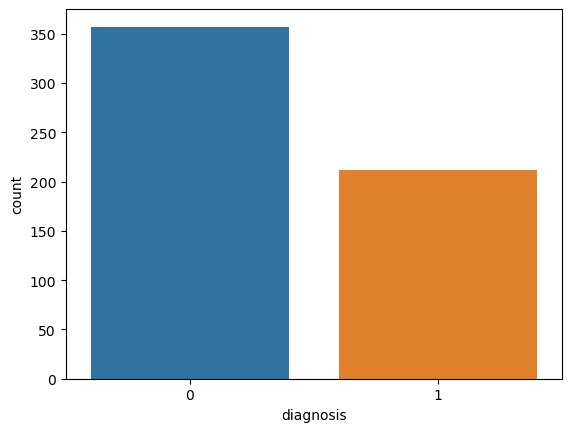

In [7]:
print("Count of B and M in dataset : ")
print(df['diagnosis'].value_counts())
sns.countplot(x= "diagnosis",data= df)

<Axes: >

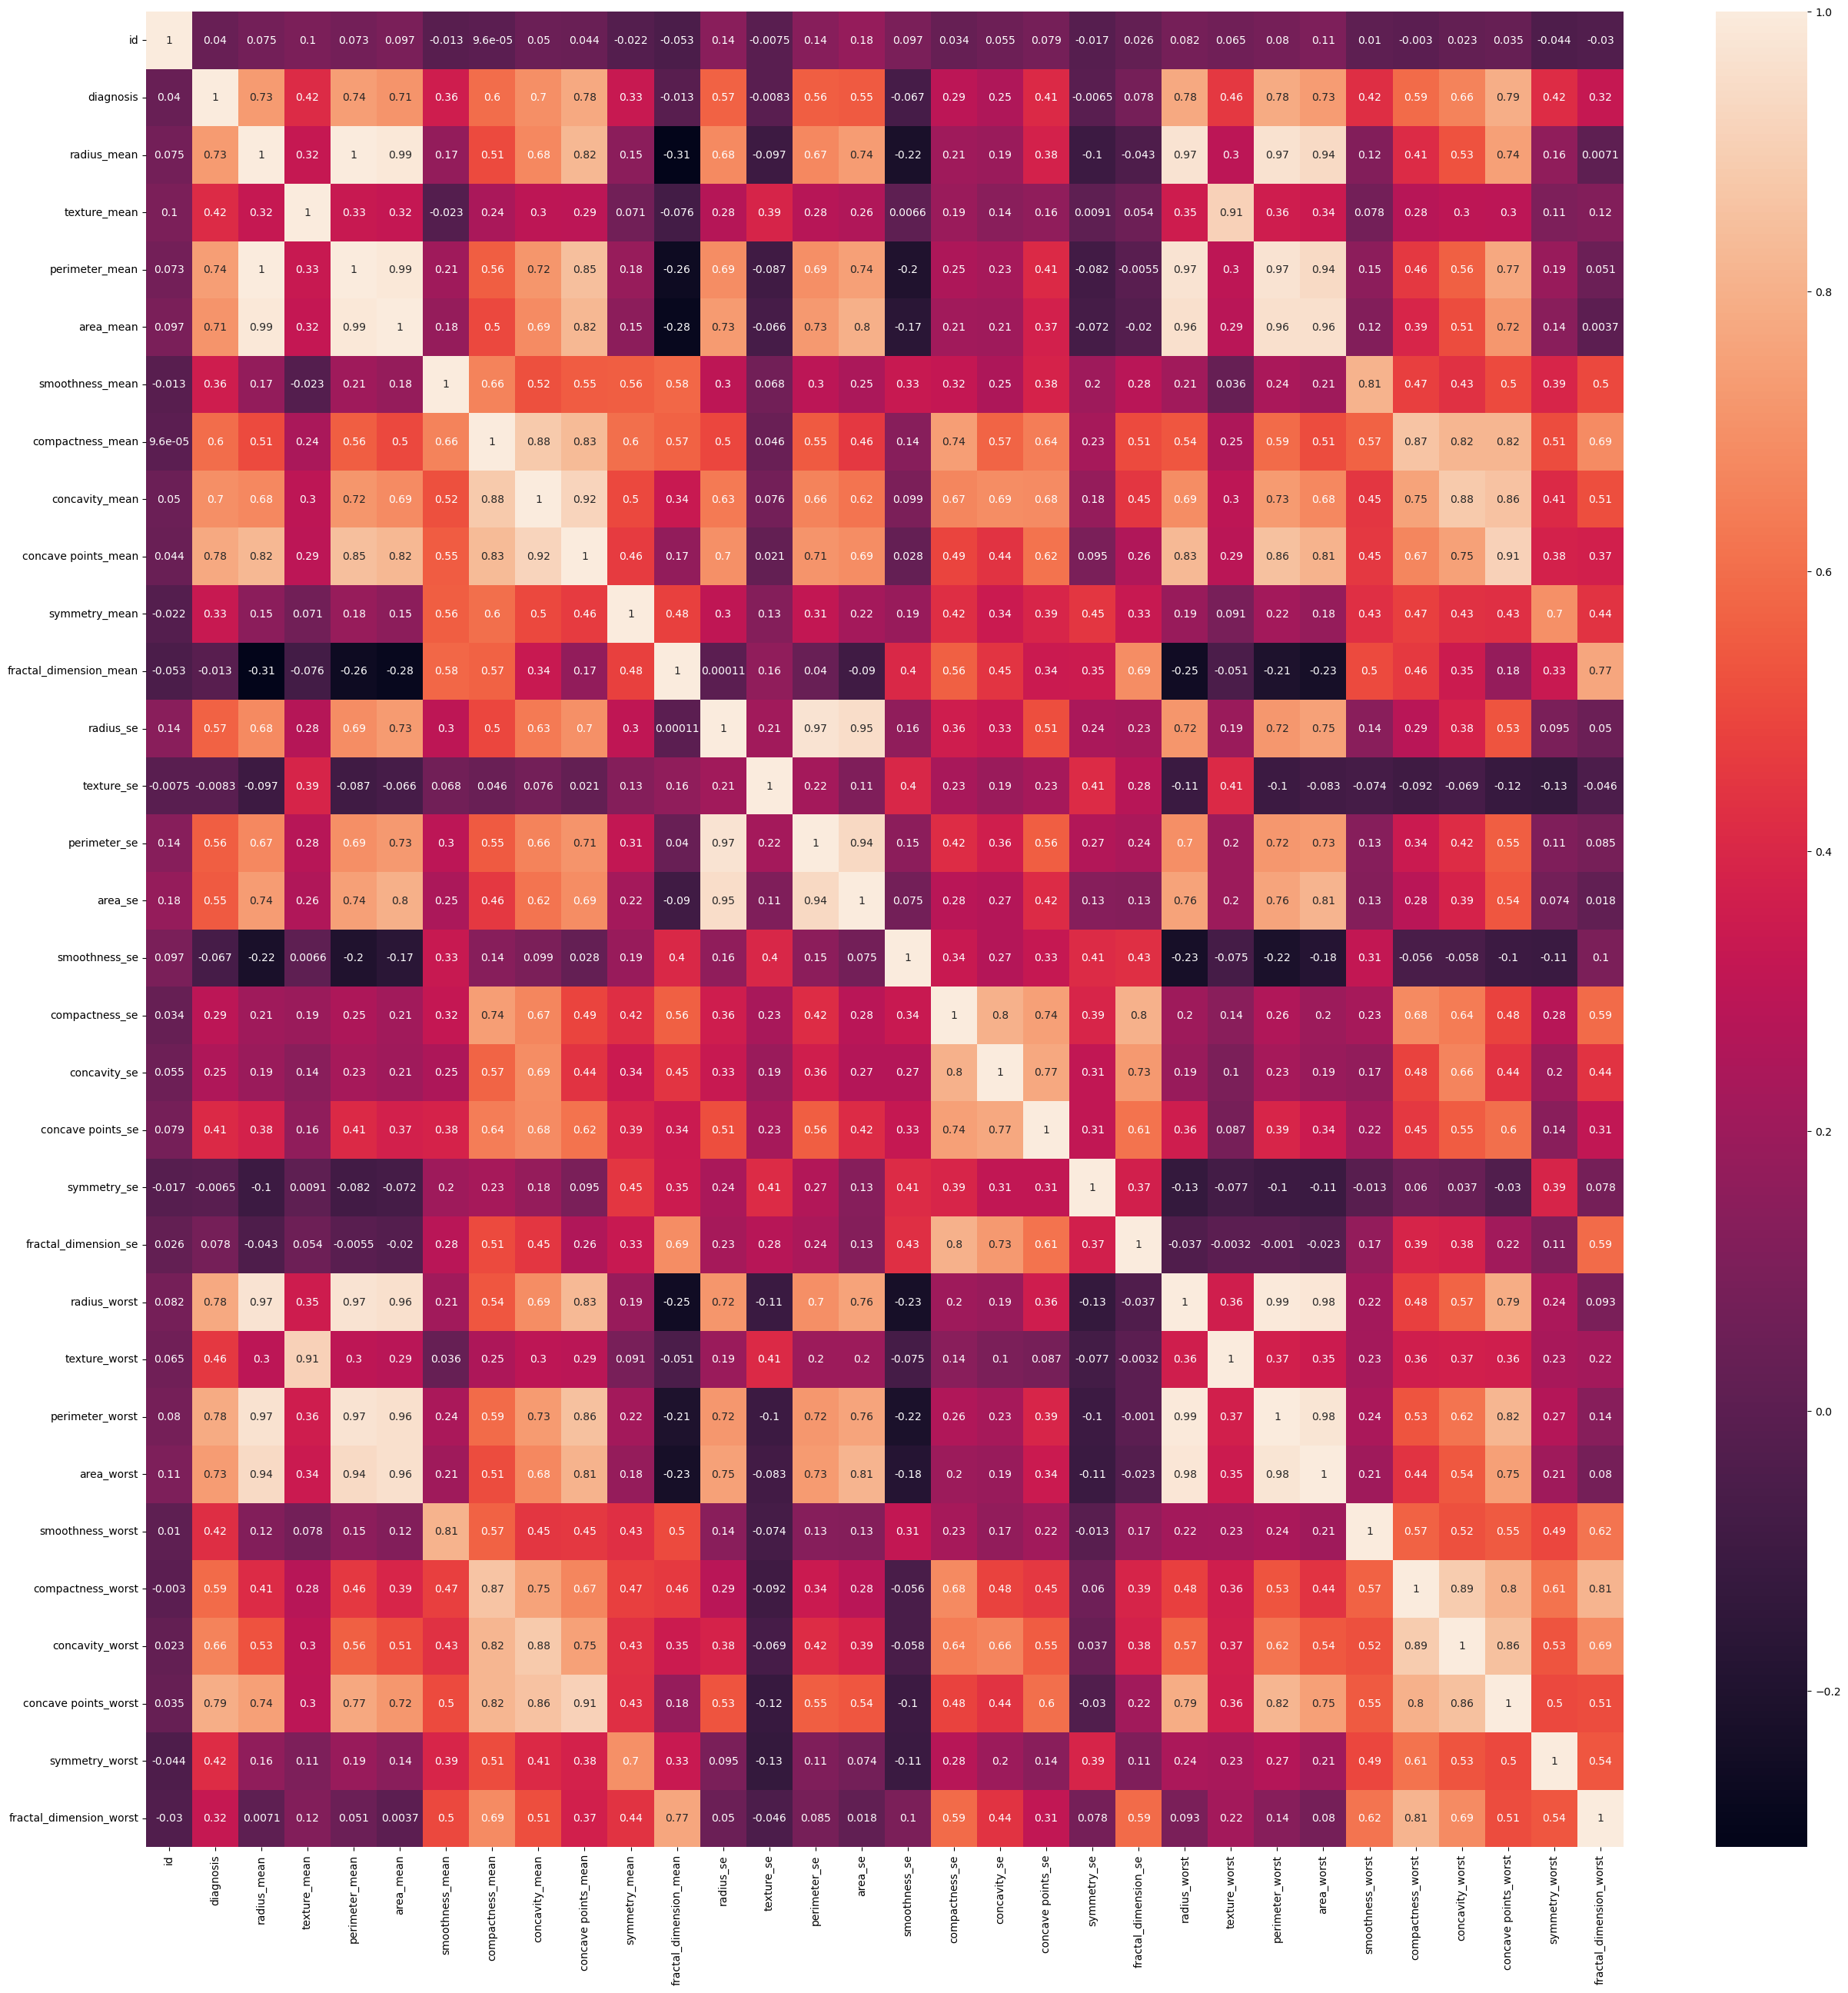

In [8]:
plt.figure(figsize=(31,31))
sns.heatmap(df.corr(),annot= True)  # Heatmap denoting correlation among features

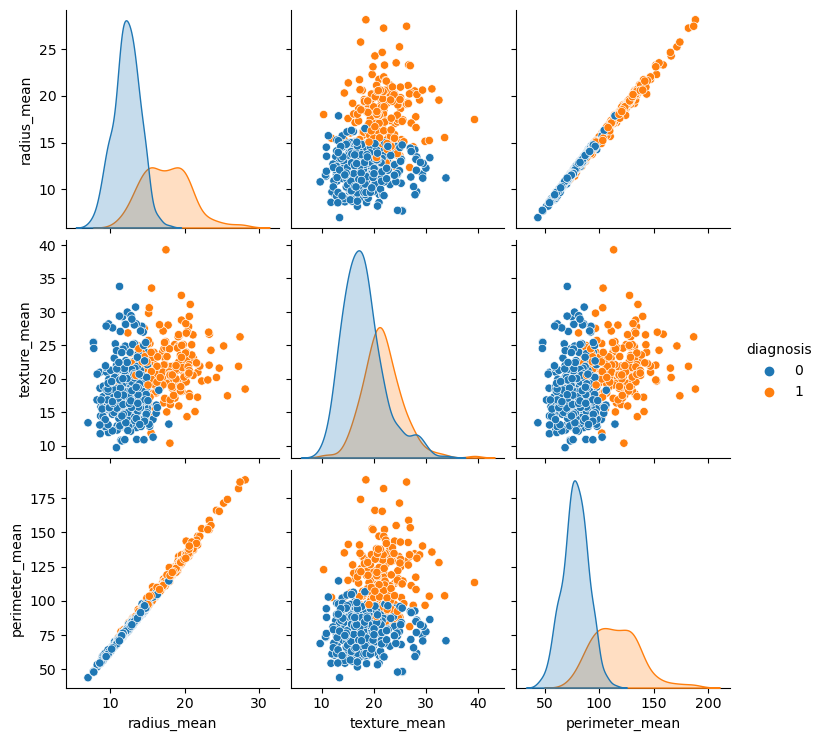

In [9]:
sns.pairplot(df,vars=['radius_mean','texture_mean','perimeter_mean'],hue='diagnosis')

# Feature Selection

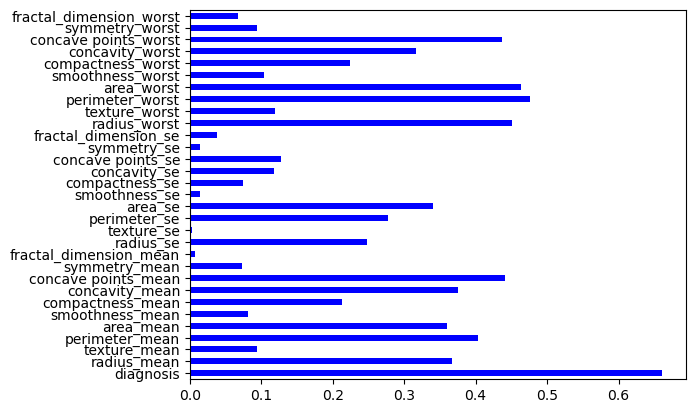

In [10]:
importances=mutual_info_classif(df.iloc[:,1:],df.iloc[:,1])
feat_importances=pd.Series(importances,df.columns[1:])
feat_importances.plot(kind='barh',color='blue')
plt.show()

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
#Dropping the features which has minimum correlation
df.drop(["texture_se","fractal_dimension_se","symmetry_se"],axis=1,inplace=True)
df.shape
 

(569, 29)

In [13]:
##Test Train Split
X = np.array(df.iloc[:,:-1])
y = np.array(df['diagnosis'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Standardization
Standardizing the data before performing KNN (K nearest neighbors) can be beneficial in a few ways: It helps to handle features that are on different scales: KNN uses the distance between data points to find the nearest neighbors. If some features are on a much larger scale than others, they could dominate the distance calculation, giving them more weight in the determination of the nearest neighbors. By standardizing the data, we transform all the features to the same scale, which can help to reduce the bias towards features with a larger scale. It can improve the performance of the model: Standardizing the data can also improve the performance of the KNN model. This is because the distance measure used in KNN (usually Euclidean distance) is sensitive to the scale of the features. By standardizing the data, we can ensure that all the features are on the same scale, which can make the distance measure more meaningful. It can make the model more interpretable: Standardizing the data can also make the KNN model more interpretable, as it can give us a clearer understanding of the relative importance of each feature in determining the nearest neighbors. When the data is not standardized, it can be difficult to compare the importance of different features, as they may be on different scales. By standardizing the data, we can more easily compare the importance of different features. In summary, standardizing the data before applying KNN can help to handle features that are on different scales, improve the performance of the model, and make the model more interpretable.

In [14]:
stdsc=StandardScaler()
X_train=stdsc.fit_transform(X_train)
X_test=stdsc.fit_transform(X_test)

# KNN Classifier

In [15]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
print("For k=10, score = ",knn.score(X_test, y_test))

For k=10, score =  1.0


In [17]:
neighbors = []
cv_scores = []

# perform 10 fold cross validation

for k in range(1, 51, 1):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  11 


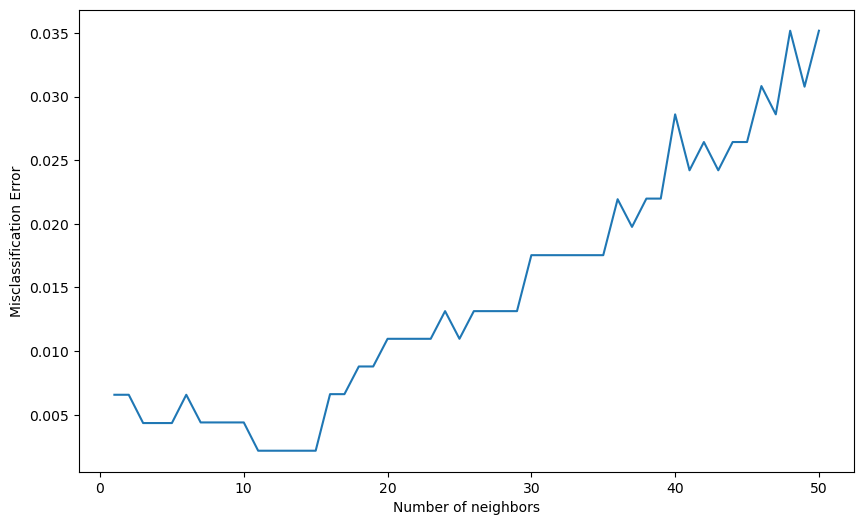

In [18]:
# Misclassification error versus k

MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [19]:
# Creating the Model with selected optimal value

knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [20]:
y_predict=knn.predict(X_test)

In [21]:
acc=accuracy_score(y_test,y_predict)
print(f'Accuracy Score of the Model: {acc}')
print('Confusion Matrix :\n')
print(confusion_matrix(y_test,y_predict))
print(f'\nClassification Report \n\n {classification_report(y_test,y_predict)}')

Accuracy Score of the Model: 1.0
Confusion Matrix :

[[71  0]
 [ 0 43]]

Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



# Random Forest Classifier

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
random_forest_model=RandomForestClassifier(max_depth=6,random_state=5)
random_forest_model.fit(X_train,y_train)
predict=random_forest_model.predict(X_test)
acc = random_forest_model.score(X_test,y_test)
print(acc)

1.0


In [24]:
scores=cross_val_score(random_forest_model,X_train,y_train,cv=10)
print("Cross validation scores : ",scores)
print("Mean score : ",np.mean(scores))

Cross validation scores :  [1.         1.         1.         0.97826087 1.         1.
 1.         1.         1.         1.        ]
Mean score :  0.9978260869565216


In [25]:
acc=accuracy_score(y_test,y_predict)
print(f'Accuracy Score of the Model: {acc}')
print('Confusion Matrix :\n')
print(confusion_matrix(y_test,y_predict))
print(f'\nClassification Report \n\n {classification_report(y_test,y_predict)}')

Accuracy Score of the Model: 1.0
Confusion Matrix :

[[71  0]
 [ 0 43]]

Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [2, 5, 7, 9]
}

grid_search = GridSearchCV(random_forest_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=6, random_state=5),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]})

In [27]:
print(grid_search.best_estimator_)
print()
print(grid_search.best_params_)
print()
print(grid_search.best_score_)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=5)

{'max_depth': 5, 'n_estimators': 5}

1.0


With the above result, we can see that Random Forest is more accurate than K-means with the provided data and the parameters.